<a href="https://colab.research.google.com/github/ParkHyeon-Ji/ITB2022/blob/main/IT%EC%99%80_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%ED%98%81%EC%8B%A0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT와비즈니스혁신 데이터 시각화 과제 가족자원경영학과 1912975 박현지

# **전처리 전 데이터 불러오기 및 기본 세팅**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITHOMEWORK/health_data.csv",encoding='cp949')

# **전처리 전 데이터 탐색 과정**

In [ ]:
# health 데이터의 기초 통계량 보여주기(모든 수치 데이터)
print(health.describe())

          기준년도      가입자일련번호          시도코드   연령대코드(5세단위)     신장(5Cm단위)  \
count  10000.0  10000.00000  10000.000000  10000.000000  10000.000000   
mean    2020.0   5000.50000     34.100100     11.931400    160.983500   
std        0.0   2886.89568     12.394581      2.166048      9.211608   
min     2020.0      1.00000     11.000000      9.000000    130.000000   
25%     2020.0   2500.75000     27.000000     10.000000    155.000000   
50%     2020.0   5000.50000     41.000000     12.000000    160.000000   
75%     2020.0   7500.25000     44.000000     13.000000    170.000000   
max     2020.0  10000.00000     49.000000     18.000000    195.000000   

         체중(5Kg 단위)          허리둘레         시력(좌)         시력(우)         청력(좌)  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      63.034500     82.366100      0.933750      0.936750      1.050500   
std       12.205294      9.561973      0.662057      0.641378      0.227936   
min       30.000000     53

In [ ]:
#허리둘레 count 정보 보여주기
허리둘레_count = health['허리둘레'].value_counts()

print(허리둘레_count) 

80.0     411
84.0     364
82.0     345
86.0     339
81.0     333
        ... 
66.9       1
68.7       1
58.3       1
62.4       1
107.4      1
Name: 허리둘레, Length: 423, dtype: int64


# **데이터 전처리 과정**

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
#health 자료의 데이터타입, null 유무 확인 과정
display(health.info())

#결측치 수 확인 과정
display(health.isna().sum())

#결측치가 없는 행만 추출
health.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/21
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/21
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/21
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/21
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,2020,9955,30,M,9,180,70,87.5,1.2,0.9,...,0.9,22.0,21.0,19.0,No,Yes,1,0.0,1.0,12/29/21
9963,2020,9964,41,F,13,160,75,107.4,0.8,0.8,...,0.8,20.0,15.0,14.0,No,Yes,1,1.0,1.0,12/29/21
9965,2020,9966,45,F,12,155,60,80.0,1.5,1.0,...,0.6,22.0,9.0,29.0,No,No,1,0.0,0.0,12/29/21
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,0.7,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,12/29/21


# **차트 3가지 사용하여 데이터 시각화 과정**

**matplotlib을 활용한 라인그래프 데이터 시각화 과정**

In [ ]:
#실행 전 설정 단계
%matplotlib inline
import matplotlib as mpl
#그래프 설정               
import matplotlib.pyplot as plt
#폰트 설정        
import matplotlib.font_manager as fm  

#글자 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False  

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mat

In [ ]:
#데이터 시각화 전 한글 폰트 설치 및 실행 
#step 1
!apt-get update -qq
!apt-get install fonts-nanum* -qq             

#step 2
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                

#step 3
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/libe

In [ ]:
#런타임 다시 시작 실행 후 폰트 실행 

#step 1
%matplotlib inline
import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm   

#step 2 
mpl.rcParams['axes.unicode_minus'] = False  

#step 3 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

#step 4
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
#폰트 실행하기 과정
from itertools import count
fm._rebuild() 

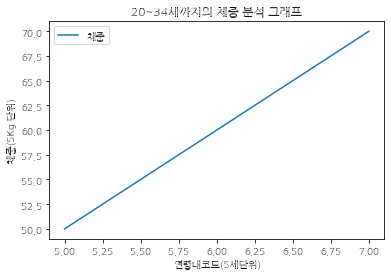

In [ ]:
#라인 그래프 만들기 

#X축과 Y축 설정
x= [5,6,7]
y= [50,60,70]

#제목 및 X축, Y축 레이블 설정
plt.title('20~34세까지의 체중 분석 그래프')
plt.xlabel('연령대코드(5세단위)')
plt.ylabel('체중(5Kg 단위)')
plt.plot(x, y, label='체중')
plt.legend()

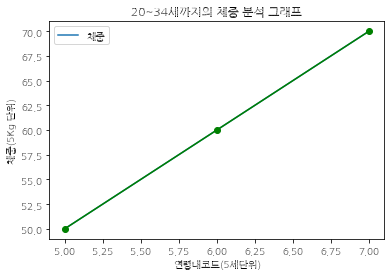

In [ ]:
#라인 그래프 다듬기 

x= [5,6,7]
y= [50,60,70]
plt.title('20~34세까지의 체중 분석 그래프')
plt.xlabel('연령대코드(5세단위)')
plt.ylabel('체중(5Kg 단위)')
plt.plot(x, y, label='체중')
plt.legend()

plt.plot([5,6,7], [50,60,70], 'bo-',  color='green')

- 위 그래프는 연령대별 체중을 나타내는 그래프를 표현하고자 하였지만 방대한 정보들로 인하여 연령대를 5,6,7, 즉 20~34세까지로 단축시키고 체중 또한 50에서 70kg까지 그래프 자체의 수치에 제한을 주어 그 범위를 정하여 그래프를 완성하였다. 

- 위 그래프는 matplotlib을 사용한 라인그래프이며 x를 연령대로 지정하였고 Y를 체중으로 지정하였으며 그래프를 만든 후에는 선을 이어주는 점을 동그란 점으로 변경, 색을 초록색으로 지정하여 그래프를 다채롭게 변경하였다. 

*인사이트 도출 *
- 많은 웹사이트와 기사 그리고 논문에서는 연령대와 체중의 관계를 다루었으며 이에 대해 모두 다양한 결과가 도출되었기 때문에 해당 데이터를 기준으로 연령대가 높아질수록 체중이 증가하는지 그 관계성을 분석해보고자 하였다. 

- 위 그래프를 보면 그래프는 아래에서 오른쪽 위로 항하는 직선의 그래프를 나타내고 있는 것을 알 수 있다. 

- 아래에서 위로 향하는 직선의 그래프는 x가 증가함에 따라 y가 증가한다는 것을 입증하는 것으로 그 뜻은 연령대가 높아짐에 따라 체중도 증가함을 알 수 있다. 

- 해당 그래프는 연령대와 체중의 범위를 함축적으로 정하여 모든 연령대를 대표하는 그래프는 아니지만 평균적으로 health데이터에는 연령대와 체중은 비례한다는 것을 알 수 있다. 

**Seaborn을 활용한 막대그래프 데이터 시각화 과정**



In [ ]:
#Seaborn 설치 및 실행
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
#theme 정하기
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#데이터 불러오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITHOMEWORK/health_data.csv",encoding='cp949') 

In [ ]:
#health데이터에서 성별 코드를 기준으로 그룹 만들기 및 시력(우) 평균 구하기
health_eye = health.groupby('성별코드', as_index = False).agg(meaneye = ('시력(우)', 'mean'))

#그룹화된 데이터 확인 
health_eye

,성별코드,meaneye
0,F,0.878712
1,M,0.991670


In [ ]:
#변수 글자 깨짐 방지를 위한 이름 바꾸기
health_eye.columns = ['gender','meaneye']

#변수 변경 확인
health_eye

,gender,meaneye
0,F,0.878712
1,M,0.991670


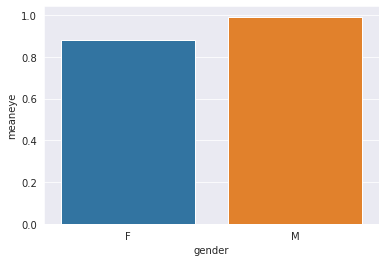

In [ ]:
#X축을 gender, Y축을 meaneye로 막대그래프 만들기
sns.barplot(data = health_eye, x = 'gender', y = 'meaneye')

- 위 그래프는 성별에 따라 오른쪽 눈의 시력의 차이가 어떠한지를 분석하고자 만든 그래프이며 seaborn 패키지를 이용하였다. group이라는 함수를 사용하여 남 과 여의 각 시력(우)를 그룹화 하였고 mean이라는 함수를 같이 사용해주어 남 녀의 오른쪽 시력의 평균을 구해보았다. 

- 위 그래프는 앞서 구현하였던 라인 그래프와는 다르게 한글 폰트 깨짐 방지를 하지 않고 대신에 rename이라는 함수를 사용하여 '성별코드'를 'gender'로 바꾸어 줌으로써 글씨 깨짐을 방지하였다. 

*인사이트 도출*
- 위 그래프를 분석해보았을 때 남성의 평균 시력(우)는 0.991, 여성은 0.88이다. 

- 위 그래프는 대상을 함축적으로 줄이지않고 모든 데이터의 평균을 구한 것이기 때문에 여성의 비해 남성의 오른쪽 눈의 시력이 더 좋다고 단정지을 수 있을 것이다.

- 위 그래프르 보면 알 수 있듯이 두 그래프의 차이는 그리 심하지않고 미세하기 때문에 특출나게 남성의 오른쪽시력이 여성보다 더 발달되어있다고는 할 수 없지만 남성의 시력이1.0을 미세하게 도달하고 있는 것으로 보면 이 둘의 시력(우) 평균은 그럼에도불구하고 남성이 더 우월하다고 할 수 있다. 


 **Seaborn을 활용한 상자그림 데이터 시각화 과정**

In [ ]:
#health데이터 중 '음주여부'와 '허리둘레' 글자 깨짐 방지 이름바꾸기
health.rename(columns = {'음주여부':'drink','허리둘레':'waist'},inplace=True)

#변수 이름 변경 확인 
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),waist,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,drink,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/21
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/21
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/21
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/21
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/21
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/21
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/21
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/21


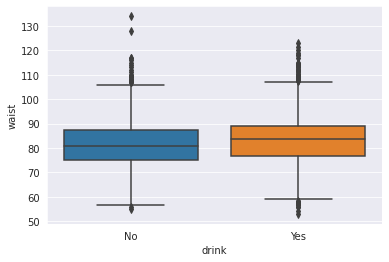

In [ ]:
#X축을 drink, Y축을 waist를 사용하여 상자그림 만들기
sns.boxplot(data = health, x = 'drink', y = 'waist')

- 위 그래프는 음주의 여부와 허리둘레의 상관성을 분석하기 위해서 seaborn 데이터를 활용하여 상자그림을 구현한 것이다. 

- 음주를 하는 사람이 하지 않는 사람에 비교해보았을 때 체중이 많이 나가고 허리둘레가 크다라는 말에 대해 분석하고자 하여 만든 그래프이다. 

- 글자 깨짐 방지를 위해 한글로 되어 있는 변수를 영어로 변경한 후에 상자그림을 완성하였다. 

*인사이트 도출*
- 음주를 하지 않는 사람과 음주를 하는 사람, 두 상자그림은 다소 뾰족한 형태의 상자를 가지고 있다. 이는 두 그룹의 체중이 극단적으로 많이 나가거나 적게 나간다는 의미가 있다. 

- 음주를 하지 않는 No집단은 상자그림이 약 75정도에서 90정도까지 분포되어있고 중앙값이 거의 중간, 중간보다 조금 아래에 그어져있는 것으로 보아 중간, 혹은 조금 낮은 체중이 많다는 것을 알 수 있다. 반면 Yes 집단은 상자그림이 약 70 후반대(78)에서 90까지 분포되어 있으며 중앙값은 중간, 중간보다 조금 위에 그어져있는 것으로 보아 중간, 혹은 조금 높은 체중이 많다는 것을 알 수 있다. 

- 최댓값, 최솟값을 언급하자면 yes집단이 no집단보다 미세하게 수염이 길고 최댓값은 yes 집단이 더 크지만 최솟값은 no집단이 더 낮다고 해석할 수 있겠으며 그 차이는 아주 미세하기 대문에 많은 의미를 둘 필요는 없을 것이다. 

- 두 집단의 상자그림 모두 아웃라이어, 즉 이상치가 존재하지만 No집단이 아웃라이어가 더 활발하기 때문에 no집단이 극단적으로 높거나 낮은 것이 더 많이 존재한다고 분석할 수 있다. 